<a href="https://colab.research.google.com/github/Procuste34/Cours-Reseaux-de-Neurones/blob/main/spirales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def generate_spiral_dataset(N, K):
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # rayon
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

In [3]:
N = 100 # nombre de points par classe
K = 3 # nombre de classes
X, Y = generate_spiral_dataset(N, K)

X = X.T
Y = Y.reshape(1, N*K)
Y_classes = Y

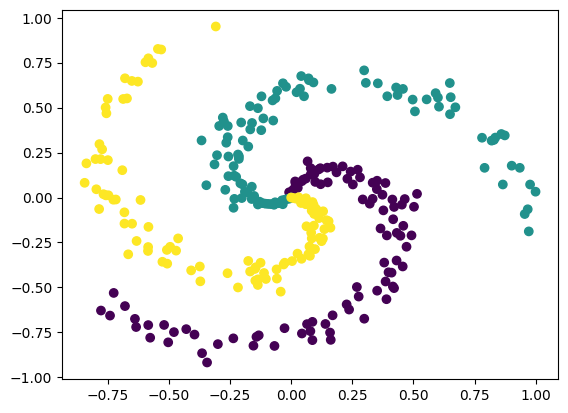

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y[0, :])

In [5]:
import torch
import torch.nn.functional as F

In [34]:
lr = 0.005

In [8]:
X = X.astype(np.float32)
Y = Y.astype(np.int64)

X = torch.from_numpy(X)
Y = torch.from_numpy(Y).long()
Y = torch.nn.functional.one_hot((Y.reshape(N*K,))).T.double()

In [24]:
W_1 = torch.randn((2, 2))
b_1 = torch.zeros((2, 1))

W_2 = torch.randn((2, 2))
b_2 = torch.zeros((2, 1))

W_3 = torch.randn((2, 2))
b_3 = torch.zeros((2, 1))

W_4 = torch.randn((2, 2))
b_4 = torch.zeros((2, 1))

W_5 = torch.randn((3, 2))
b_5 = torch.zeros((3, 1))

W_1.requires_grad = True
b_1.requires_grad = True
W_2.requires_grad = True
b_2.requires_grad = True
W_3.requires_grad = True
b_3.requires_grad = True
W_4.requires_grad = True
b_4.requires_grad = True
W_5.requires_grad = True
b_5.requires_grad = True

In [35]:
for i in range(10000):
  Z_1 = torch.matmul(W_1, X) + b_1
  A_1 = torch.tanh(Z_1)

  Z_2 = torch.matmul(W_2, A_1) + b_2
  A_2 = torch.tanh(Z_2)

  Z_3 = torch.matmul(W_3, A_2) + b_3
  A_3 = torch.tanh(Z_3)

  Z_4 = torch.matmul(W_4, A_3) + b_4
  A_4 = torch.tanh(Z_4)

  Z_5 = torch.matmul(W_5, A_4) + b_5

  loss = F.cross_entropy(Z_5.T, Y.T)

  if(i%1000==0):
        print(loss)

  W_1.grad = None
  b_1.grad = None
  W_2.grad = None
  b_2.grad = None
  W_3.grad = None
  b_3.grad = None
  W_4.grad = None
  b_4.grad = None
  W_5.grad = None
  b_5.grad = None

  loss.backward()

  W_1.data += -lr * W_1.grad
  b_1.data += -lr * b_1.grad
  W_2.data += -lr * W_2.grad
  b_2.data += -lr * b_2.grad
  W_3.data += -lr * W_3.grad
  b_3.data += -lr * b_3.grad
  W_4.data += -lr * W_4.grad
  b_4.data += -lr * b_4.grad
  W_5.data += -lr * W_5.grad
  b_5.data += -lr * b_5.grad

tensor(0.0720, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0416, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0410, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0404, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0400, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0396, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0392, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0388, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0393, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0395, dtype=torch.float64, grad_fn=<DivBackward1>)


In [36]:
def predict(X):
    #h = 0
    #return h >= 0.5

    Z_1 = torch.matmul(W_1, X) + b_1
    A_1 = torch.tanh(Z_1)

    Z_2 = torch.matmul(W_2, A_1) + b_2
    A_2 = torch.tanh(Z_2)

    Z_3 = torch.matmul(W_3, A_2) + b_3
    A_3 = torch.tanh(Z_3)

    Z_4 = torch.matmul(W_4, A_3) + b_4
    A_4 = torch.tanh(Z_4)

    Z_5 = torch.matmul(W_5, A_4) + b_5
    A_5 = torch.softmax(Z_5, axis=0)

    return torch.argmax(A_5, axis=0)

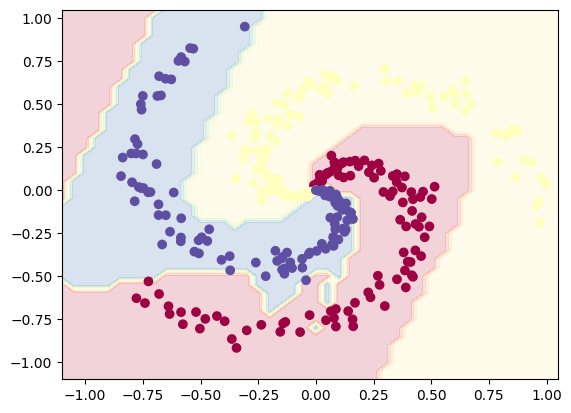

In [37]:
xx, yy = np.meshgrid(np.arange(-1.1, 1.1, 0.05), np.arange(-1.1, 1.1, 0.05))
X_disp = np.c_[xx.ravel(), yy.ravel()]

#h = _sigmoid(w_1*X_disp[:, 0] + w_2*X_disp[:, 1] + b) > 0.5
h = predict(torch.from_numpy(X_disp.T.astype(np.float32)))
h = h.reshape(xx.shape)

plt.contourf(xx, yy, h, cmap=plt.cm.Spectral, alpha=0.2)
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [38]:
Z_1 = torch.matmul(W_1, X) + b_1
A_1 = torch.tanh(Z_1)

Z_2 = torch.matmul(W_2, A_1) + b_2
A_2 = torch.tanh(Z_2)

Z_3 = torch.matmul(W_3, A_2) + b_3
A_3 = torch.tanh(Z_3)

Z_4 = torch.matmul(W_4, A_3) + b_4
A_4 = torch.tanh(Z_4)

Z_5 = torch.matmul(W_5, A_4) + b_5
A_5 = torch.softmax(Z_5, axis=0)

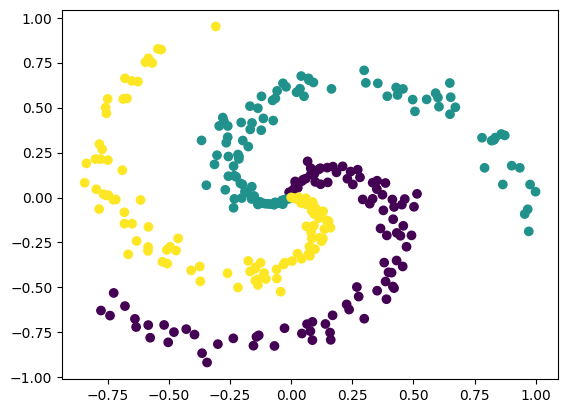

In [39]:
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :])

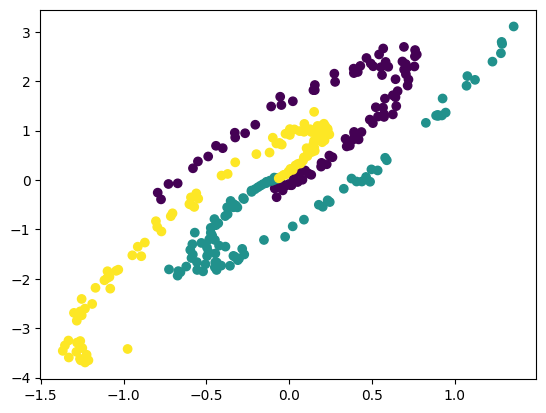

In [40]:
plt.scatter(Z_1.detach()[0, :], Z_1.detach()[1, :], c=Y_classes[0, :])

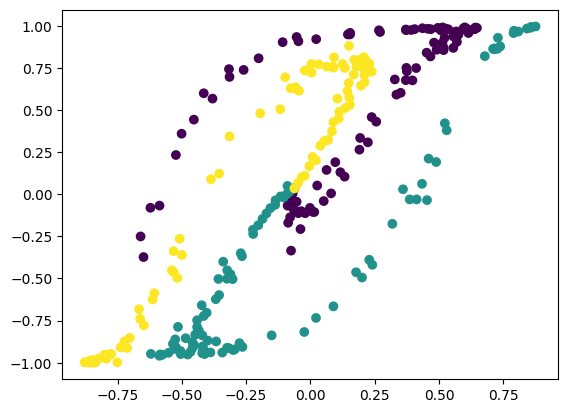

In [41]:
plt.scatter(A_1.detach()[0, :], A_1.detach()[1, :], c=Y_classes[0, :])

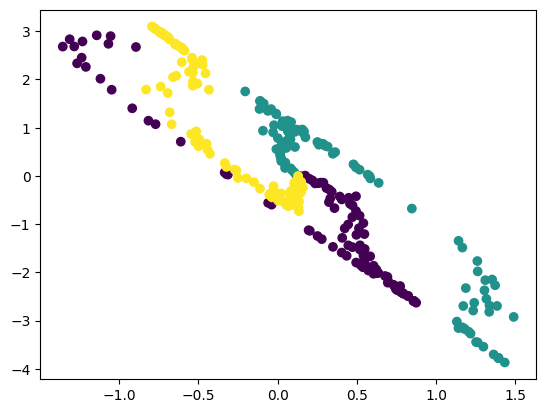

In [42]:
plt.scatter(Z_2.detach()[0, :], Z_2.detach()[1, :], c=Y_classes[0, :])

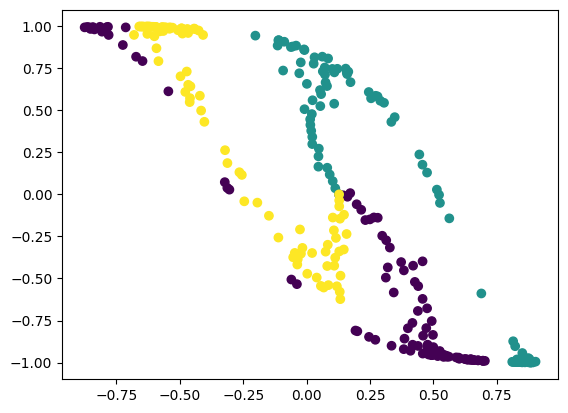

In [43]:
plt.scatter(A_2.detach()[0, :], A_2.detach()[1, :], c=Y_classes[0, :])

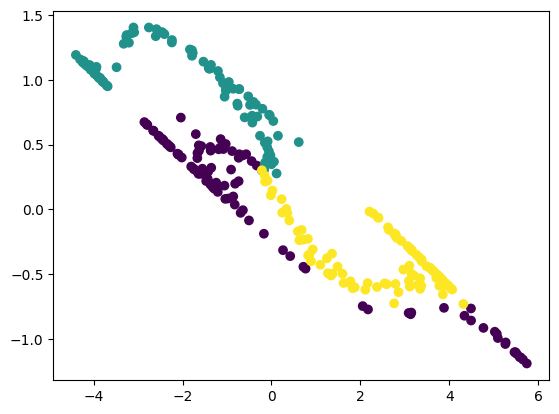

In [44]:
plt.scatter(Z_3.detach()[0, :], Z_3.detach()[1, :], c=Y_classes[0, :])

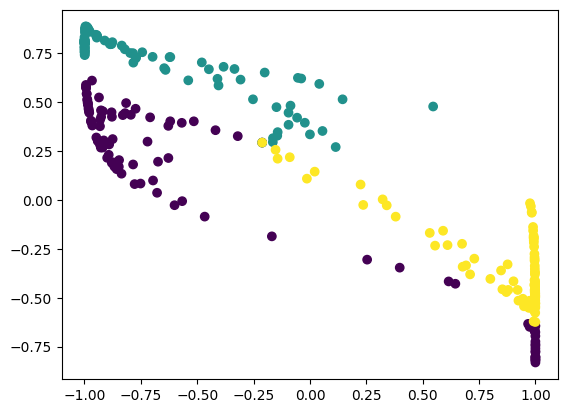

In [45]:
plt.scatter(A_3.detach()[0, :], A_3.detach()[1, :], c=Y_classes[0, :])

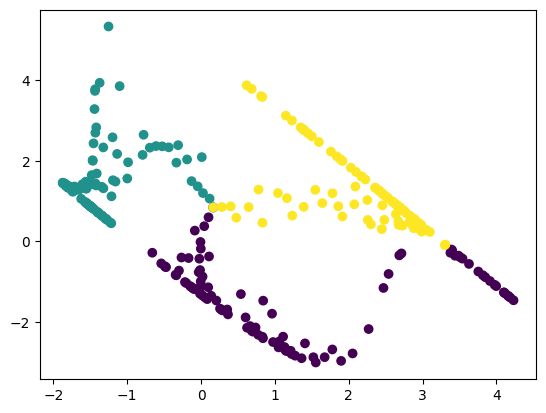

In [46]:
plt.scatter(Z_4.detach()[0, :], Z_4.detach()[1, :], c=Y_classes[0, :])

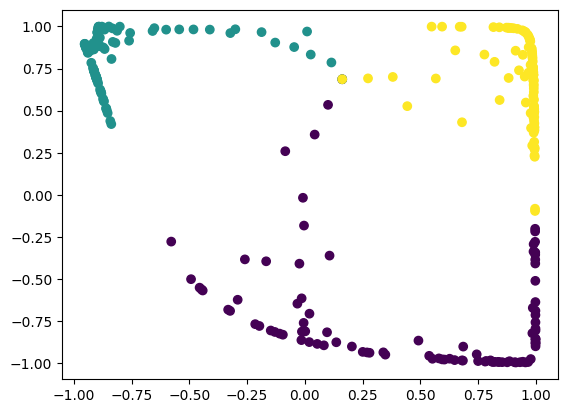

In [47]:
plt.scatter(A_4.detach()[0, :], A_4.detach()[1, :], c=Y_classes[0, :])

In [50]:
W_1, b_1

(tensor([[ 1.3593, -0.5190],
         [ 2.6227, -2.7823]], requires_grad=True),
 tensor([[-0.0626],
         [ 0.0349]], requires_grad=True))

In [51]:
W_2, b_2

(tensor([[ 2.4914, -1.0747],
         [-5.4849,  1.3292]], requires_grad=True),
 tensor([[ 0.3219],
         [-0.3900]], requires_grad=True))

In [52]:
W_3, b_3

(tensor([[-7.7461, -1.8341],
         [ 2.6234,  1.1498]], requires_grad=True),
 tensor([[ 0.7754],
         [-0.0331]], requires_grad=True))

In [53]:
W_4, b_4

(tensor([[-0.7829, -4.4641],
         [ 4.3056,  6.6979]], requires_grad=True),
 tensor([[ 1.3056],
         [-0.2087]], requires_grad=True))

In [54]:
W_5, b_5

(tensor([[-0.6965, -5.3560],
         [-4.7223,  2.3815],
         [ 5.8499,  2.9689]], requires_grad=True),
 tensor([[ 3.0574],
         [-0.3765],
         [-2.6811]], requires_grad=True))